In [110]:

# CRM 분석이란 무엇인가?

# CRM 분석은 귀사의 판매 및 고객 서비스 성과를 입증하는 데이터입니다. 또한 CRM 분석은 보다 현명한 비즈니스 의사 결정을 알리는 데 사용할 수 있는 고객 데이터를 제공합니다. 일반적으로 CRM 소프트웨어를 사용하여 CRM 분석을 얻고 모든 데이터 수집 및 보고서 생성을 자동화합니다.

# CRM 분석의 이점

# CRM 분석의 주요 이점은 이를 사용하여 영업, 고객 서비스 및 마케팅 프로세스를 알릴 수 있다는 것입니다. CRM 분석을 사용하여 다음을 통해 방법을 개선할 수 있습니다.

# 고객 서비스 평가. CRM 분석은 고객 서비스 팀의 성과를 알려줍니다. 팀이 개선할 수 있는 수치를 발견하면, 이러한 목표를 향해 팀을 추진하는 관행을 구현하십시오.
# 정확한 고객 데이터. 고객 데이터를 인구 통계 마케팅 또는 전자 메일 마케팅에 사용하든, 적합한 사람에게 연락하고 있는지 알아야 합니다. CRM 분석은 당신이 그것을 하고 있다는 것을 보장한다.
# 철저한 고객 분석. 당신의 고객은 보통 한 분기당 얼마를 소비합니까? 같은 제품을 몇 번이고 사는 건가요, 아니면 다른 건가요? CRM 분석을 통해 이러한 질문에 대한 확실한 답을 얻을 수 있으며, 배운 내용을 사용하여 마케팅 전략을 개선할 수 있습니다.
# 효율적인 리드 생성. 당신의 CRM 분석은 당신의 마케팅 노력 중 어떤 것이 구매와 가장 강하게 관련이 있는지 알려줄 수 있다. 구매와 밀접한 관련이 있는 한 가지 접근 방식이 있지만 이러한 접근 방식을 통해 일부 고객만을 대상으로 했다면, 이 방법을 더 시도해 보십시오. 즉, 매출이 증가할 수 있습니다.
# 데이터 셋 설명 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


In [111]:
import os
import datetime
import squarify
import warnings
import pandas as pd 
import numpy as np
import datetime as dt
from operator import attrgetter

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.graph_objs as go

from plotly.offline import iplot
from sklearn.metrics import (silhouette_score,
                             calinski_harabasz_score,
                             davies_bouldin_score)
                             
from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.plotting import plot_period_transactions

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
%matplotlib inline
palette = 'Set2'

In [112]:
dataset =  pd.read_csv('/Users/hyeonchanglee/Documents/data_analyst/004마케팅_퍼널/CRM_dataset/CRM_dataset.csv', \
    encoding = 'unicode_escape',dtype = {'CustomerID': str,'InvoiceID': str},)

dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])

df = dataset.copy()
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country  
0      2

In [113]:
df.isnull().sum(),  df.duplicated().sum()



(InvoiceNo           0
 StockCode           0
 Description      1454
 Quantity            0
 InvoiceDate         0
 UnitPrice           0
 CustomerID     135080
 Country             0
 dtype: int64,
 5268)

In [114]:
# plt.plot(df['Country'].value_counts())

# 데이터 . iplot(kind = 종류)

# iplot실행하기 위한 cufflinks를 임포트
import cufflinks as cf
cf.go_offline(connected=True)


country_data = df['Country'].value_counts()
country_data.iplot(kind='bar')

In [115]:
# 막대그래프 
# 고객별로 보기

df['Sales'] = df['Quantity'] * df['UnitPrice']

customer_spend = df.groupby(['CustomerID'])['Sales'].sum().sort_values(ascending=False)
print(customer_spend)

customer_spend.head(20).iplot(kind='bar')

CustomerID
14646    279489.02
18102    256438.49
17450    187482.17
14911    132572.62
12415    123725.45
           ...    
12503     -1126.00
17603     -1165.30
14213     -1192.20
15369     -1592.49
17448     -4287.63
Name: Sales, Length: 4372, dtype: float64


In [116]:
# 표그래프 그리기
# 국가별로 보기

country_spend = df.groupby(['Country'])['Sales'].sum().sort_values(ascending=False).head(10)
print(country_spend)

import plotly.express as px
c =  px.pie(country_spend,
        values='Sales',
        names=country_spend.index,
        title='top 10 of Country sales')

iplot(c)

Country
United Kingdom    8187806.364
Netherlands        284661.540
EIRE               263276.820
Germany            221698.210
France             197403.900
Australia          137077.270
Switzerland         56385.350
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: Sales, dtype: float64


In [117]:
# 가장 잘 팔리는 상품
# 상품으로 보기


# Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
#        'UnitPrice', 'CustomerID', 'Country', 'Sales'],
#       dtype='object')


print(df['StockCode'].unique())
print(df['StockCode'].nunique()) # 4070 

# print(df.groupby(['StockCode'])['Sales'].sum().sort_values(ascending=False).head(20))
print(df.groupby(['Description'])['Sales'].sum().sort_values(ascending=False).head(20))

items = df.groupby(['Description'])['Sales'].sum().sort_values(ascending=False).head(20)

items.iplot(kind='bar')


['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
4070
Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
RABBIT NIGHT LIGHT                     66756.59
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63791.94
ASSORTED COLOUR BIRD ORNAMENT          58959.73
CHILLI LIGHTS                          53768.06
SPOTTY BUNTING                         42065.32
JUMBO BAG PINK POLKADOT                41619.66
BLACK RECORD COVER FRAME               40596.96
PICNIC BASKET WICKER 60 PIECES         39619.50
SET OF 3 CAKE TINS PANTRY DESIGN       37413.44
DOORMAT KEEP CALM AND COME IN          36565.39
JAM MAKING SET WITH JARS               36116.09
WOOD BLACK BOARD ANT WHITE FINISH      35859.27
LUNCH BAG RED RETROSPOT                34897.31
POPCORN HOLDE

In [118]:

# 상품의 수량으로 보기

# print(df.groupby(['StockCode'])['Sales'].sum().sort_values(ascending=False).head(20))
print(df.groupby(['Description'])['Quantity'].sum().sort_values(ascending=False).head(20))

items = df.groupby(['Description'])['Quantity'].sum().sort_values(ascending=False).head(20)

items.iplot(kind='bar')

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
VICTORIAN GLASS HANGING T-LIGHT       23854
ASSORTED COLOURS SILK FAN             23082
BROCADE RING PURSE                    23053
RED  HARMONICA IN BOX                 21866
JUMBO BAG PINK POLKADOT               21009
SMALL POPCORN HOLDER                  20116
PAPER CHAIN KIT 50'S CHRISTMAS        18902
LUNCH BAG RED RETROSPOT               18779
60 TEATIME FAIRY CAKE CASES           18040
PARTY BUNTING                         18022
Name: Quantity, dtype: int64


In [119]:
# 기간으로 보기

date_df = df.copy()

date_df['InvoiceDate'] =  date_df['InvoiceDate'].dt.strftime('%Y-%m-%d')
# print(date_df.groupby(['InvoiceDate'])['Sales'].sum())

sales_per_day = date_df.groupby(['InvoiceDate'])['Sales'].sum()

l = px.line(
    sales_per_day)

iplot(l)

month_df = df.copy()
month_df['InvoiceDate'] = month_df['InvoiceDate'].dt.strftime('%Y-%m')

sales_per_month = month_df.groupby(['InvoiceDate'])['Sales'].sum()
print(sales_per_month)

m = px.line(
    sales_per_month)

iplot(m)

InvoiceDate
2010-12     748957.020
2011-01     560000.260
2011-02     498062.650
2011-03     683267.080
2011-04     493207.121
2011-05     723333.510
2011-06     691123.120
2011-07     681300.111
2011-08     682680.510
2011-09    1019687.622
2011-10    1070704.670
2011-11    1461756.250
2011-12     433668.010
Name: Sales, dtype: float64


In [120]:

# <2. 세계 지도로 분포 확인>
# 고객아이디, 송장번호, 국가순으로 그룹, reset_index를 통해 인덱스를 없앰
world_map = df[['CustomerID','InvoiceNo','Country']].groupby(['CustomerID','InvoiceNo','Country']).count().reset_index(drop=False)
countries = world_map['Country'].value_counts() # 국가 컬럼의 값 개수를 셈
# print(world_map)
# print(contries)

data = dict(type='choropleth',
            locations = countries.index,
            locationmode = 'country names',
            z = countries,
            text = countries.index,
            colorbar = {'title':'Orders'},
            colorscale='Viridis',
            reversescale = False)

layout = dict(title={'text': "Number of Orders by Countries",
                     'y':0.9,
                     'x':0.5,
                     'xanchor': 'center',
                     'yanchor': 'top'},
              geo = dict(resolution = 50,
                         showocean = True,
                         oceancolor = "LightBlue",
                         showland = True,
                         landcolor = "whitesmoke",
                         showframe = True),
             template = 'plotly_white',
             height = 600,
             width = 1000)

choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate = False)

In [121]:
df2 = df.copy()
# 1. 전처리

# print(df2[df2['InvoiceNo'].str.startswith('C')])
# print(df2[~df2['InvoiceNo'].str.contains('C',na=False)])

df2 = df2[~df2['InvoiceNo'].str.contains('C',na=False)] # 취소건은 제거
df2 = df2[df2['Quantity'] > 0] # 환불건은 제거
df2.dropna(inplace=True) # null건은 제거

df2['Sales'] = df2['Quantity'] * df2['UnitPrice']

cltv_c = df2.groupby(['CustomerID']).agg({
    'InvoiceNo' : lambda x : x.nunique(),
    'Quantity' : lambda x : x.sum(),
    'Sales' : lambda x : x.sum()
})


cltv_c.columns = ['Total_Transactions','Total_Unit','Total_Price']
cltv_c.sort_values(by='Total_Price',ascending=False).head(20)

,Total_Transactions,Total_Unit,Total_Price
CustomerID,,,
14646,74,197491,280206.02
18102,60,64124,259657.30
17450,46,69993,194550.79
16446,2,80997,168472.50
14911,201,80515,143825.06
12415,21,77670,124914.53
14156,55,57885,117379.63
17511,31,64549,91062.38
16029,63,40208,81024.84


In [122]:
# 2. 고객당 평균 거래 금액

cltv_c['Average_Order_Value']= cltv_c['Total_Price']/ cltv_c['Total_Transactions']
print(cltv_c.sort_values(by='Average_Order_Value', ascending=False))

            Total_Transactions  Total_Unit  Total_Price  Average_Order_Value
CustomerID                                                                  
16446                        2       80997    168472.50         84236.250000
12346                        1       74215     77183.60         77183.600000
15749                        3       18028     44534.30         14844.766667
15098                        3         121     39916.50         13305.500000
12357                        1        2708      6207.67          6207.670000
...                        ...         ...          ...                  ...
17816                        4          30        36.56             9.140000
14792                        1           2         6.20             6.200000
16738                        1           3         3.75             3.750000
16454                        2           3         6.90             3.450000
13256                        1       12540         0.00             0.000000

In [123]:
Average_Order_Value = cltv_c.sort_values(by='Average_Order_Value', ascending=False).head(10)

Average_Order_Value.iplot(kind='bar')

# Descriptive Statistics
# 서술적 통계

In [124]:
print(df[['Quantity','UnitPrice']].describe())


            Quantity      UnitPrice
count  541909.000000  541909.000000
mean        9.552250       4.611114
std       218.081158      96.759853
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000


# Data Preprocessing

In [125]:
# df_ = df.copy()
# df_ = df_.dropna() # null값 제거

# #취소주문
# # ~ 는 ~가 아닌것의 not과 동일
# print(df_[~df_['InvoiceNo'].str.contains('C',na=False)]) # InvoiceNo에 C가 포함되지 않은 데이터를 출력

# print(df_[df_['InvoiceNo'].str.contains('C',na=False)])
# a = df_[df_['InvoiceNo'].str.contains('C',na=False)]

# print(df_[df_['Quantity'] > 0])
# b = df_[df_['Quantity'] < 0]

# # 수량이 0보다 작은 것(=취소건)과 송장번호가 C로 시작하는 것(=취소건)이 동일한지 화인
# a.equals(b) # True


In [126]:
def replace_with_thresholds(dataframe, variable, q1=0.25, q3=0.75):
    df_ = dataframe.copy() # 입력받은 데이터 프레임의 카피를 만듬
    quartile1 = df_[variable].quantile(q1) # 데이터 프레임의 variable 컬럼의 0.25값을 저장
    quartile3 = df_[variable].quantile(q3) # 데이터 프레임의 variable 컬럼의 0.75값을 저장
    iqr = quartile3 - quartile1 # 0.5값 가운데 값을 도출함

    up_limit = quartile3 + 1.5 * iqr # 0.75 와 1.5곱하기 0.5값을 더함
    low_limit = quartile1 - 1.5 * iqr  # 0.25 와 1.5곱하기 0.5값을 더함
    df_.loc[(df_[variable] < low_limit), variable] = low_limit # 최저값으로 설정한 수준보다 낮아지면 설정 최저값으로 통일  
    df_.loc[(df_[variable] > up_limit), variable] = up_limit # 최고값으로 설정한 수준보다 높아지면 설정 최고값으로 통일

    return df_


def ecommerce_preprocess(dataframe):
    df_ = dataframe.copy() # dataframe의 복사본을 만듬

    df_ = df_.dropna() #null값 제거
    
    #Nan값이 존재하는 경우 False로 치환, 즉 Nan은 C가 포함된 송장넘버라고 고려하지 않음
    df_ = df_[~df_['InvoiceNo'].str.contains('C', na=False)] # 취소건 삭제
    df_ = df_[df_['Quantity']>0] # 수량이 0보다 큰 값만 저장
    
    df_ = replace_with_thresholds(df_, 'Quantity', q1=0.01, q3=0.99) # 상위 1% 하위 1%는 잘라냄 Thresholds 임계점, 한계값
    df_ = replace_with_thresholds(df_, 'UnitPrice', q1=0.01, q3=0.99) # 상위 1% 하위 1%는 잘라냄

    df_['TotalPrice'] = df_['Quantity'] * df_['UnitPrice']

    return df_




In [127]:
df = ecommerce_preprocess(df)

In [128]:
print(df[['Quantity','UnitPrice','TotalPrice']].describe())


            Quantity      UnitPrice     TotalPrice
count  397924.000000  397924.000000  397924.000000
mean       11.833736       2.893163      20.627751
std        25.534512       3.227059      51.826400
min         1.000000       0.000000       0.000000
25%         2.000000       1.250000       4.680000
50%         6.000000       1.950000      11.800000
75%        12.000000       3.750000      19.800000
max       298.500000      37.060000    3268.575000


In [129]:
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1         536365     71053                  WHITE METAL LANTERN       6.0   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS      12.0   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL        6.0   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL        4.0   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE       4.0   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT        3.0   

               InvoiceDate  UnitPrice CustomerID         Country  Sales  \


# RFM Analysis

RFM은 Recency, Frequency 및 Money value를 나타내며, 각각은 몇 가지 주요 고객 특성에 해당합니다. 이러한 RFM 측정 기준은 빈도와 금전적 가치가 고객의 평생 가치에 영향을 미치고, 근래에는 참여의 척도인 유지에 영향을 미치기 때문에 고객의 행동을 나타내는 중요한 지표입니다.

RFM 요인은 다음과 같은 사실을 보여줍니다.

최근 구매일수록 고객이 판촉 활동에 더 많은 반응을 보입니다.
고객이 더 자주 구매할수록 참여도와 만족도가 높아집니다.
금전적 가치는 많은 소비자와 낮은 가치의 구매자를 구별합니다.

최근 자주 돈을 많이 쓴 고객


In [130]:
print(df['InvoiceDate'].min())
print(df['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:50:00


In [131]:
today_date = dt.datetime(2011,12,11)
# print(today_date) #2011-12-11 00:00:00 오늘이라고 가정, 데이터의 마지막날 하루 뒤

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate' : lambda x : (today_date - x.max()).days,
    'InvoiceNo' : lambda x : x.nunique(),
    'TotalPrice' : lambda x : x.sum()
})

# 고객 아이디로 그룹화
# 송장 일자를 오늘 날자에서 최대 날짜(마지막 구매날짜)를 뺀 날짜로, 3이면 최근으로부터 3일전에 구매함을 의미 (최근의 정의)
# 송장 번호를 유니크한 개수로, 5 이면 해당 기간동안 5개의 별도의 주문을 함을 의미 (빈도의 정의)
# 구매 금액을 다 더함 (금전가치의 정의)

rfm.columns = ['recency','frequency','monetary']
# rfm['monetary'] = rfm[rfm['monetary'] > 0]

rfm = rfm.reset_index()

print(rfm)


     CustomerID  recency  frequency  monetary
0         12346      326          1    310.44
1         12347        3          7   4310.00
2         12348       76          4   1770.78
3         12349       19          1   1491.72
4         12350      311          1    331.46
...         ...      ...        ...       ...
4334      18280      278          1    180.60
4335      18281      181          1     80.82
4336      18282        8          2    178.05
4337      18283        4         16   2094.88
4338      18287       43          3   1837.28

[4339 rows x 4 columns]


In [132]:
print(rfm['monetary'].sort_values(ascending =False))

1690    266163.525
4202    231584.345
1880    139033.730
3729    131710.645
55      120210.355
           ...    
4099        12.750
3015         6.900
1794         6.200
3218         3.750
685          0.000
Name: monetary, Length: 4339, dtype: float64


# RFM Scores



In [133]:
def get_rfm_scores(dataframe):
    
    df_ = dataframe.copy()

    #qcut 은 데이터프레임 내의 데이터를 동일한 숫자로 등분함 # 5등분 
    # 5점 ~ 1점으로 스코어제, labels에 따라 작은값->큰값으로 0번째 레이블, 1번째.. 로 매김
    # 최근 점수
    df_['recency_score'] = pd.qcut(df_['recency'],5,labels=[5,4,3,2,1])

    # df['a'].rank()함수는  method=first는 동점 관측치 중 먼저 나타나는 값을 높은 순위를 줌
    # 빈도 점수
    df_['frequency_score'] = pd.qcut(df_['frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
    # 금전 가치 점수
    df_['menetary_score'] = pd.qcut(df_['monetary'],5,labels=[1,2,3,4,5])
    
    df_['RFM_SCORE'] = (df_['recency_score'].astype(str)) + (df_['frequency_score'].astype(str))

    return df_

rfm = get_rfm_scores(rfm)



In [134]:
rfm


,CustomerID,recency,frequency,monetary,recency_score,frequency_score,menetary_score,RFM_SCORE
0,12346,326,1,310.44,1,1,2,11
1,12347,3,7,4310.00,5,5,5,55
2,12348,76,4,1770.78,2,4,4,24
3,12349,19,1,1491.72,4,1,4,41
4,12350,311,1,331.46,1,1,2,11
...,...,...,...,...,...,...,...,...
4334,18280,278,1,180.60,1,2,1,12
4335,18281,181,1,80.82,1,2,1,12
4336,18282,8,2,178.05,5,3,1,53
4337,18283,4,16,2094.88,5,5,5,55


# Segmentation

10개의 등급으로 나누었으면 이는 각 기업의 기준마다 다르다.

RFM 3가지 기준에 1~5점의 각각 점수를 부여함
recency, frequency, monetary 순
최근과 자주 구매하는지만 고려

1. 최근에 구매하지 않았고 자주 구매하지 않음 : hibernating(휴면)
2. 최근에 구매하지 않았으나 구매시 종종 구매함 : at_Risk(위험)
3. 최근에는 구매하지 않았으나 구매 빈도가 아주 높음 : cant_loose(놓쳐서 안되는 고객)
4. 2달전 쯤 구매했지만 자주 구매하지 않음 : about_to_sleep(이탈 우려 고객)
5. 2달전 쯤 구매했지만 여태 어느정도 자주 구매함 : need_attention(집중 해야할 고객)
6. 2달전 쯤 구매하고 자주 물건을 구매함 : loyal_customers(충성 고객)
7. 꽤 최근 구매, 처음 구매 : promising(최근 유입 고객)
8. 최근 구매, 처음 구매 : new_customers(신규유저)
9. 꽤 최근에 구매하고 빈도도 적당함 : potential_loyalists(잠재 우량 고객)
10. 최근 구매 다수 구매 : champions(최고 고객)

        r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}



In [135]:
seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}


rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)

rfm

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,menetary_score,RFM_SCORE,segment
0,12346,326,1,310.44,1,1,2,11,hibernating
1,12347,3,7,4310.00,5,5,5,55,champions
2,12348,76,4,1770.78,2,4,4,24,at_Risk
3,12349,19,1,1491.72,4,1,4,41,promising
4,12350,311,1,331.46,1,1,2,11,hibernating
...,...,...,...,...,...,...,...,...,...
4334,18280,278,1,180.60,1,2,1,12,hibernating
4335,18281,181,1,80.82,1,2,1,12,hibernating
4336,18282,8,2,178.05,5,3,1,53,potential_loyalists
4337,18283,4,16,2094.88,5,5,5,55,champions


# Segmentation Map

In [136]:
segments = rfm['segment'].value_counts().sort_values(ascending = False)
segments.iplot(kind='bar')

In [137]:
# treemap 차트로 표현

segments = rfm['segment'].value_counts().sort_values(ascending = False)
# 밸류의 숫자를 센 세그먼트 컬럼을 변수에 저장 champions = 3090, new_customer= 500 등

from plotly import express as px

fig = px.treemap(
    segments, # 데이터셋
    names = list(segments.index),
    path= ['segment'], # 데이터 프레임 내 어떤 컬럼을 사용할 것인지
    values= segments.values, # 데이터의 값을 비중으로 나타냄
    title= 'segments비중' # 차트의 제목을 나타냄
)

fig.show()

In [138]:
# segments = rfm['segment'].value_counts().sort_values(ascending = False)
# fig = plt.gcf()
# ax = fig.add_subplot()
# fig.set_size_inches(16, 10)
# squarify.plot(sizes=segments,
#               label=[label for label in seg_map.values()],
#               color=['#AFB6B5', '#F0819A', '#926717', '#F0F081', '#81D5F0',
#                      '#C78BE5', '#748E80', '#FAAF3A', '#7B8FE4', '#86E8C0'],
#               pad = False,
#               bar_kwargs = {'alpha': 1},
#               text_kwargs = {'fontsize':15})
# plt.title("Customer Segmentation Map", fontsize = 20)
# plt.xlabel('Frequency', fontsize = 18)
# plt.ylabel('Recency', fontsize = 18)
# plt.show()

# Model Evaluation

In [139]:
from sklearn.metrics import (silhouette_score,
                             calinski_harabasz_score,
                             davies_bouldin_score)

X = rfm[['recency_score','frequency_score']]
# print(X)

labels = rfm['segment']
# print(labels)

print('관측 개수 : {}'.format(X.shape[0]))
print('세그먼트 개수 : {}'.format(labels.nunique()))
print('실루엣 계수 : {}'.format(round(silhouette_score(X,labels),3)))

# 실루엣 계수(Silhouette Coefficient) : 

# 각 데이터 포인트와 주위 데이터 포인트들과의 거리 계산을 통해 값을 구하며,
# 군집 안에 있는 데이터들은 잘 모여있는지,
# 군집끼리는 서로 잘 구분되는지 클러스터링을 평가하는 척도로 활용된다.

# * 참고한 논문의 표현을 빌리자면, 군집 내 비유사성('within' dissimilarities)은 작고, 
# 군집 간 비유사성('between' dissimilarities)은 커야 생성된 클러스터의 품질이 좋다고 할 수 있다. 



print('칼린스키-하라바즈 스코어 : {}'.format(round(calinski_harabasz_score(X, labels),3)))
print('다비스 볼딘 스코어 : {}'.format(round(davies_bouldin_score(X, labels),3)))
print(''.format())

관측 개수 : 4339
세그먼트 개수 : 10
실루엣 계수 : 0.471
칼린스키-하라바즈 스코어 : 4591.503
다비스 볼딘 스코어 : 0.633



# Segment Analysis


In [140]:
rfm[['recency','monetary','frequency','segment']].groupby('segment').agg({'mean','std','max','min'})

recency                             monetary               \
                        min        mean  max        std      min         mean   
segment                                                                         
about_to_sleep           34   53.312500   72  10.943474     6.20   469.058097   
at_Risk                  73  153.785835  374  68.618828    52.00   938.458341   
cant_loose               73  132.968254  373  65.250378    70.02  2646.822540   
champions                 1    6.361769   13   3.683300   198.23  6498.612978   
hibernating              73  217.605042  374  92.013560     3.75   398.573036   
loyal_customers          15   33.608059   72  15.577050    36.56  2752.519574   
need_attention           34   52.427807   72  11.552074     6.90   847.657086   
new_customers             1    7.428571   13   3.902112    89.94   314.883690   
potential_loyalists       1   17.398760   33   9.338808    20.80   674.628357   
promising                15   23.421053   33   5.238115     0.00   282.617158   

                                              frequency                  \
                            max           std       min       mean  max   
segment                                                                   
about_to_sleep         6207.670    533.161343         1   1.161932    2   
at_Risk               11072.670    943.170824         2   2.878583    6   
cant_loose            10254.180   2008.352354         6   8.380952   34   
champions            266163.525  18366.105822         3  12.417062  210   
hibernating            9182.345    553.714975         1   1.101774    2   
loyal_customers      120210.355   5405.787839         3   6.479853   63   
need_attention         4353.830    732.298552         2   2.326203    3   
new_customers           848.550    174.620952         1   1.000000    1   
potential_loyalists    4628.750    601.746293         1   2.010331    3   
promising              1491.720    224.363976         1   1.000000    1   

                                
                           std  
segment                         
about_to_sleep        0.368913  
at_Risk               0.954415  
cant_loose            4.289630  
champions            16.476484  
hibernating           0.302492  
loyal_customers       4.545669  
need_attention        0.470081  
new_customers         0.000000  
potential_loyalists   0.651401  
promising             0.000000

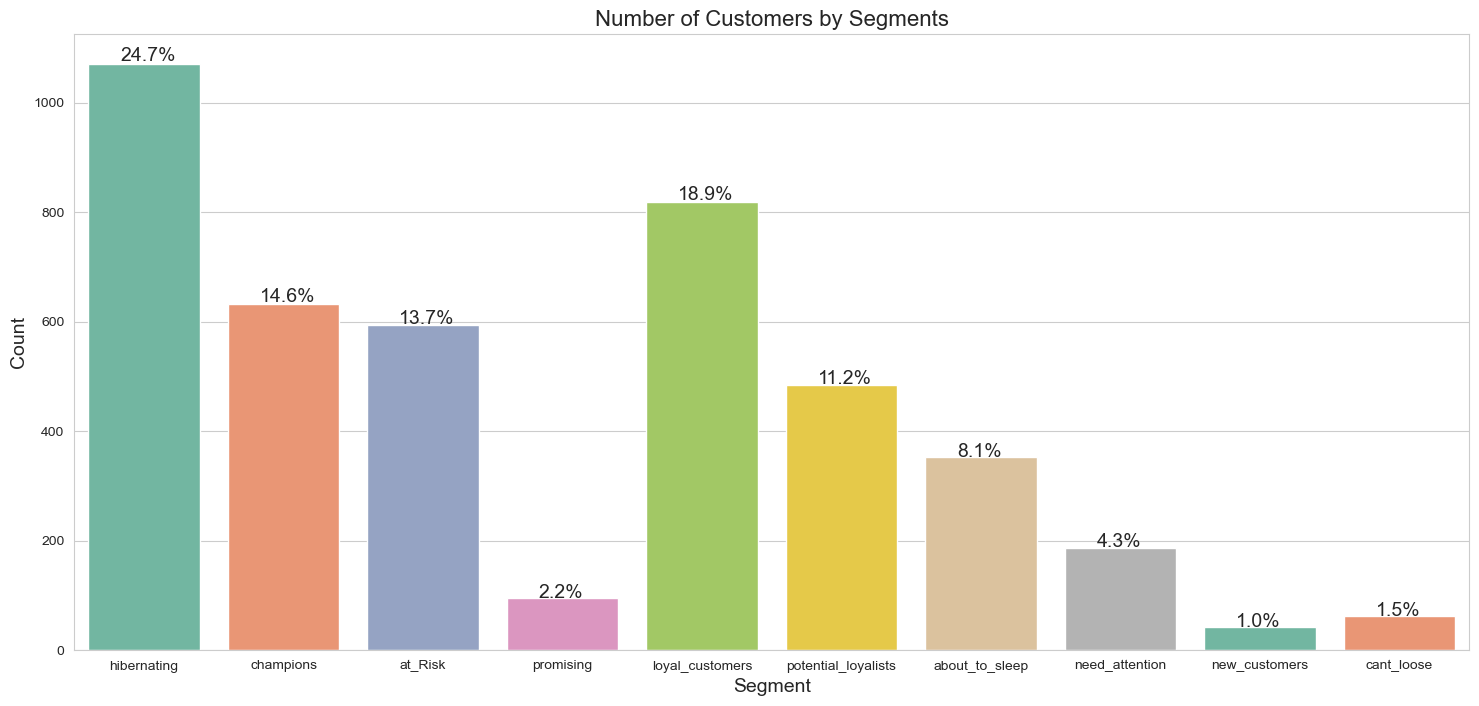

In [141]:
plt.figure(figsize = (18, 8))
ax = sns.countplot(data = rfm,
                   x = 'segment',
                   palette = palette)
total = len(rfm.segment)
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 14)
plt.title('Number of Customers by Segments', size = 16)
plt.xlabel('Segment', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

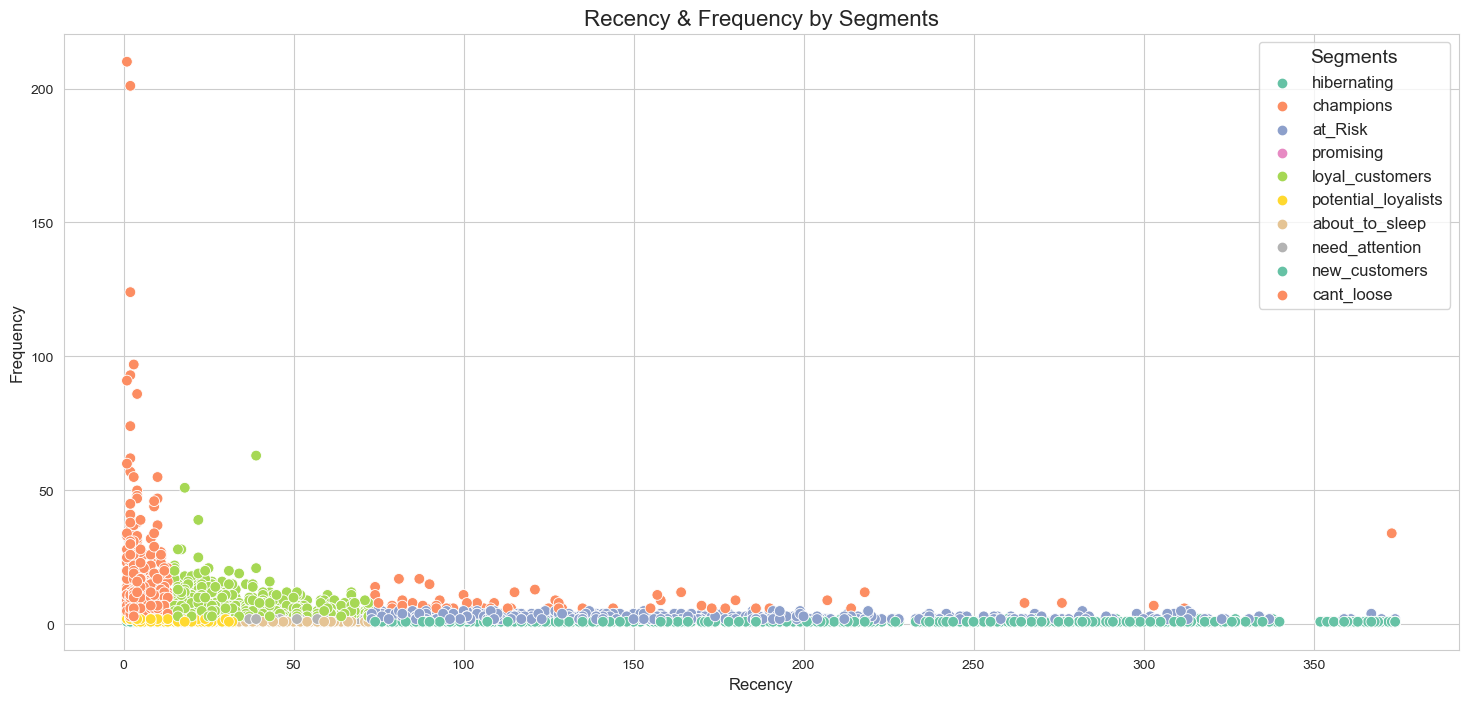

In [142]:
plt.figure(figsize = (18, 8))
sns.scatterplot(data = rfm, x = 'recency',
                y = 'frequency', hue ='segment', palette= palette, s = 60)
plt.title('Recency & Frequency by Segments', size = 16)
plt.xlabel('Recency', size = 12)
plt.ylabel('Frequency', size = 12)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.legend(loc = 'best', fontsize = 12,
           title = 'Segments',title_fontsize=14)
plt.show()

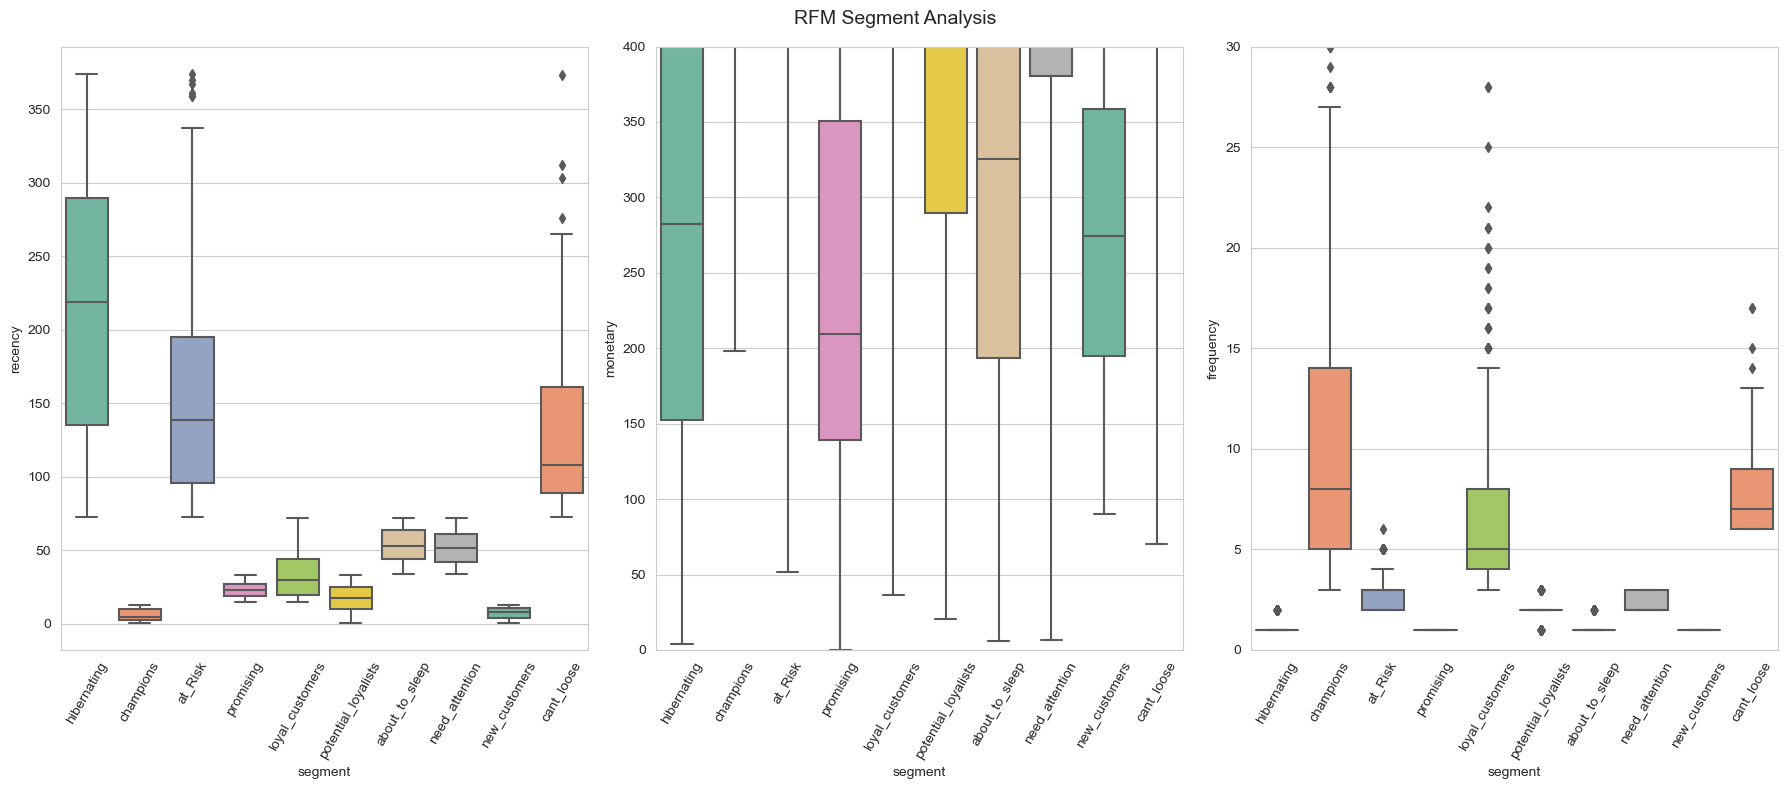

In [143]:
fig, axes = plt.subplots(1, 3, figsize = (18, 8))
fig.suptitle('RFM Segment Analysis', size = 14)
feature_list = ['recency', 'monetary', 'frequency']
for idx, col in enumerate(feature_list):
    sns.boxplot(ax = axes[idx], data = rfm,
                x = 'segment', y = feature_list[idx],
                palette= palette)
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=60)
    if idx == 1:
        axes[idx].set_ylim([0, 400])
    if idx == 2:
        axes[idx].set_ylim([0, 30])
plt.tight_layout()
plt.show()

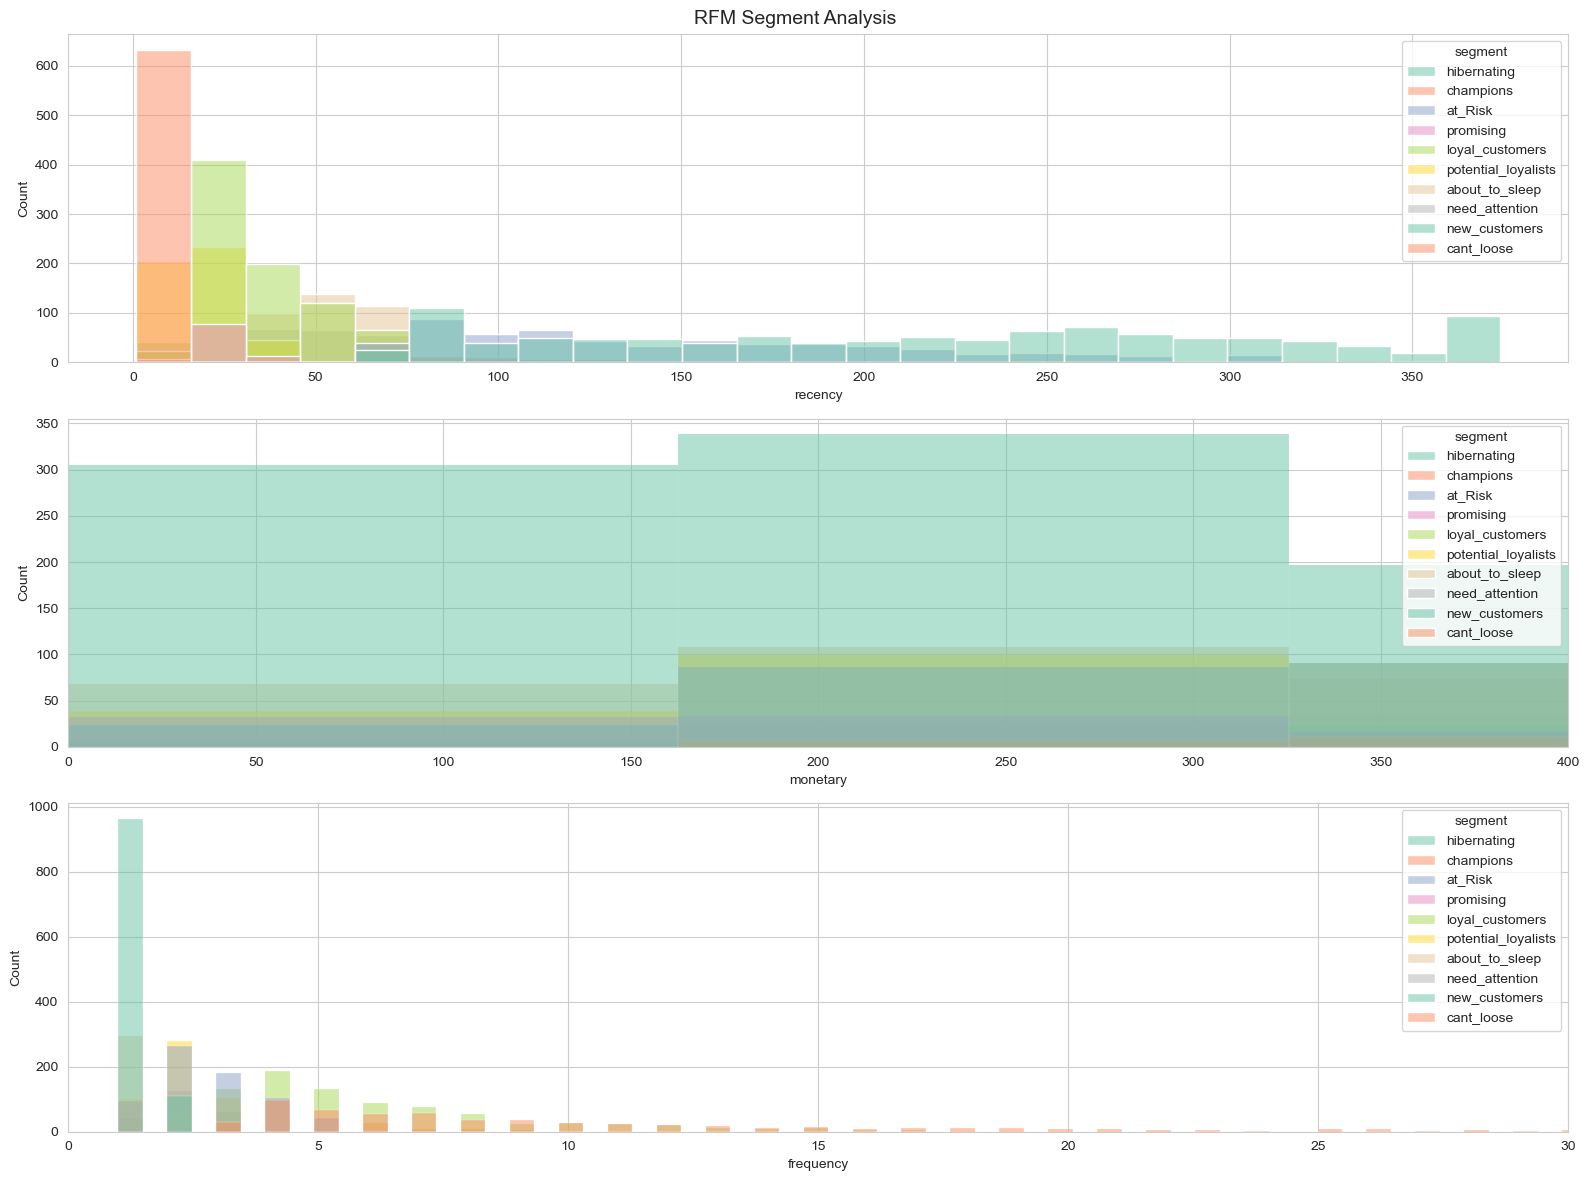

In [144]:
fig, axes = plt.subplots(3, 1, figsize=(16, 12))
fig.suptitle('RFM Segment Analysis', size = 14)
feature_list = ['recency', 'monetary', 'frequency']
for idx, col in enumerate(feature_list):
    sns.histplot(ax = axes[idx], data = rfm,
                 hue = 'segment', x = feature_list[idx],
                 palette= palette)
    if idx == 1:
        axes[idx].set_xlim([0, 400])
    if idx == 2:
        axes[idx].set_xlim([0, 30])
plt.tight_layout()
plt.show()


# Cohort Analysis

코호트는 앱 가입 날짜, 첫 구매 월, 지리적 위치, 획득 채널(유기 사용자, 공연 마케팅 등) 등 공통점을 공유하는 사람들의 모임이다. 코호트 분석에서, 우리는 몇 가지 일반적인 패턴이나 행동을 식별하기 위해 이러한 사용자 그룹을 시간에 따라 추적한다.

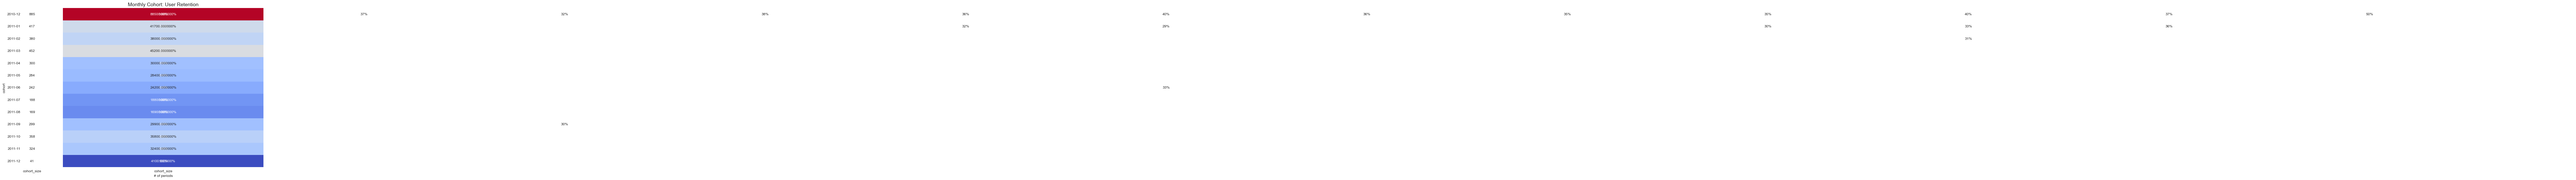

In [145]:
def cohortAnalysis(dataframe):
    # 1. 데이터프레임을 카피합니다.
    data = dataframe.copy() 
    # 2. 고객아이디, 송장번호, 송장일자에서 중복을 제외한 데이터를 저장합니다.
    data = data[['CustomerID','InvoiceNo','InvoiceDate']].drop_duplicates() 
    # 3. 주문 월이라는 새 컬럼을 생성하고 송장 날짜에서 월만 추출한 데이터를 저장합니다.
    data['order_month'] = data['InvoiceDate'].dt.to_period('M')
    # 4. 코호트 컬럼을 만듭니다. 고객아이디로 그룹화 한 후 송장일자컬럼의 최저(처음 구매날짜)의 월을 추출
    data['cohort'] = data.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
    # 5. 고객 아이디의 유니크 값을 세그먼트로 분류한 그룹에서 뽑아냄
    cohort_data = data.groupby(['cohort','order_month']).agg(n_customers=('CustomerID','nunique')).reset_index(drop=False)
    # cohort_data = data.groupby('segment')['CustomerID'].count()

    # 6. 
    cohort_data['period_number'] = (cohort_data.order_month - cohort_data.cohort).apply(attrgetter('n'))

    # 7.
    cohort_pivot = cohort_data.pivot_table(
        index = 'cohort',
        columns = 'period_number',
        values = 'n_customers'
    )

    # 8. 
    cohort_size = cohort_pivot.iloc[:,0]

    # 9.
    retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

    # 10.
    with sns.axes_style('white'):
        fig, ax = plt.subplots(1, 2, figsize=(12,8),
        sharey=True,
        gridspec_kw ={ 'width_ratios':[1,11]})

        sns.heatmap(
            retention_matrix,
            mask = retention_matrix.isnull(),
            annot = True,
            cbar = False,
            fmt = '.0%',
            cmap = 'coolwarm',ax= ax[1]
        )

        ax[1].set_title('월별 코호트 : 유저 리텐션', fontsize=14)

        ax[1].set(
            xlabel='기간',
            ylabel=' '
        )

        white_cmap = mcolors.ListedColormap(['white'])
        
        sns.heatmap(pd.DataFrame(cohort_size).rename(columns={0 : 'cohort_size'}),
            annot = True,
            cbar = False,
            fmt = '0%',
            cmap = 'coolwarm', ax = ax[1]
        )
        
        ax[1].set_title('Monthly Cohort: User Retention', fontsize=14)

        ax[1].set(xlabel='# of periods', ylabel=' ')

        white_cmap = mcolors.ListedColormap(['white'])

        sns.heatmap(pd.DataFrame(cohort_size).rename(columns={0:'cohort_size'}),
            annot=True,
            cbar=False,
            fmt='g',
            cmap=white_cmap,
            ax=ax[0]
        )
        
        fig.tight_layout()

cohortAnalysis(df)


    



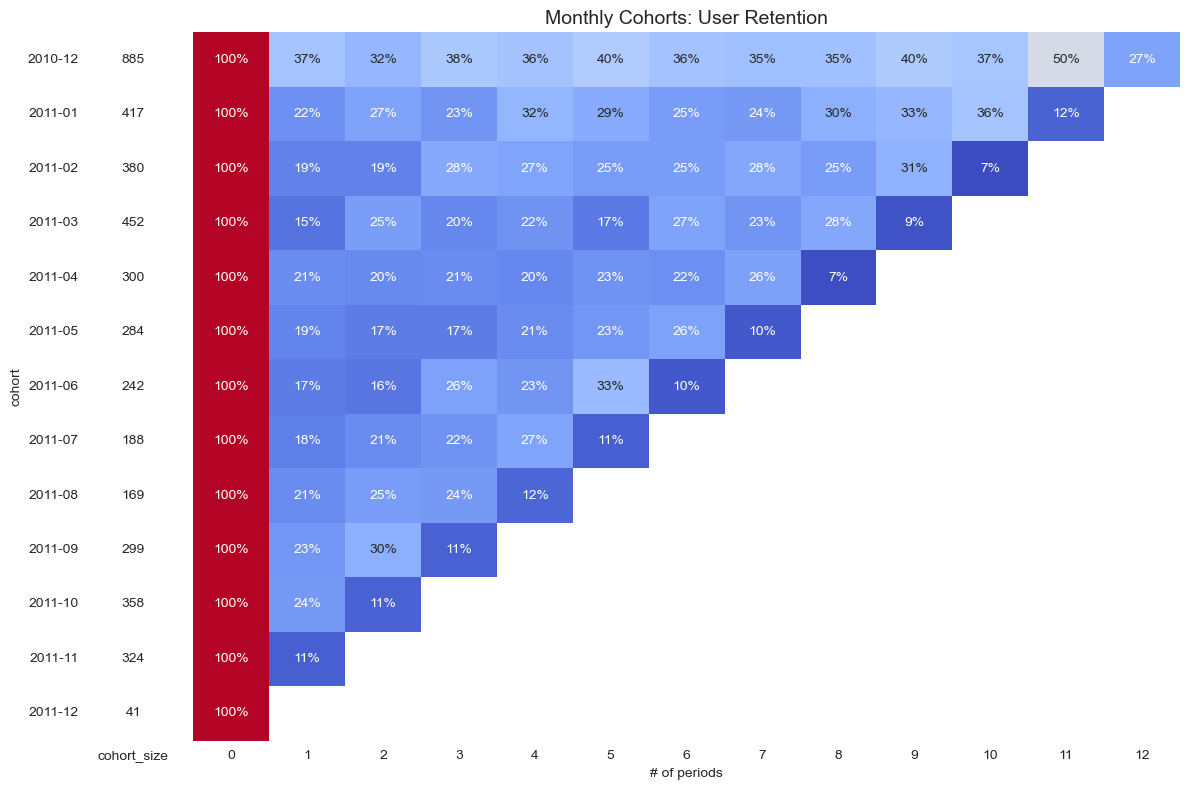

In [146]:
def CohortAnalysis(dataframe):
    
    data = dataframe.copy()
    data = data[['CustomerID', 'InvoiceNo', 'InvoiceDate']].drop_duplicates()
    data['order_month'] = data['InvoiceDate'].dt.to_period('M')
    data['cohort'] = data.groupby('CustomerID')['InvoiceDate']\
    .transform('min').dt.to_period('M')
    cohort_data = data.groupby(['cohort', 'order_month'])\
    .agg(n_customers=('CustomerID', 'nunique')).reset_index(drop=False)
    cohort_data['period_number'] = (cohort_data.order_month - cohort_data.cohort)\
    .apply(attrgetter('n'))
    cohort_pivot = cohort_data.pivot_table(index = 'cohort',
                                           columns = 'period_number',
                                           values = 'n_customers')
    cohort_size = cohort_pivot.iloc[:,0]
    retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)
    with sns.axes_style("white"):
        fig, ax = plt.subplots(1, 2, figsize=(12, 8),
                        sharey=True,
                        gridspec_kw={'width_ratios': [1, 11]})
        sns.heatmap(retention_matrix, 
                    mask = retention_matrix.isnull(), 
                    annot = True,
                    cbar = False,
                    fmt='.0%', 
                    cmap='coolwarm', ax=ax[1])
        ax[1].set_title('Monthly Cohorts: User Retention', fontsize=14)
        ax[1].set(xlabel='# of periods',
                  ylabel='')
        white_cmap = mcolors.ListedColormap(['white'])
        sns.heatmap(pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'}), 
                    annot=True, 
                    cbar = False,
                    fmt='g',
                    cmap=white_cmap,
                    ax=ax[0])
        fig.tight_layout()
    
CohortAnalysis(df)



# Customer Lifetime Value
고객 평생 가치는 고객이 지불 고객으로서 전체 기간 동안 얼마나 많은 돈을 브랜드에 가져다 줄 것인가?

https://assaeunji.github.io/statistics/2022-04-15-ltv/

LTV는 확률 기반 모형으로 특정한 시점 t에서 고객마다 어느정도의 생애가치를 가져다 주는지 측정

고객의 과거 구매정보를 가지고 미래의 예상 구매횟수 * 예상 평균수익으로 계산
----

고객의 과거 구매정보 :  
    1. 첫 구매 ~ 집계일까지의 시간(T)
    2. 첫 구매 ~ 마지막 구매일자까지의 시간(Recency ; tx - t0)
    3. 첫 구매 ~ 집계일까지의 구매 횟수(Frequency ; x)
    4. 구매 건 마다의 구매 금액(Monetary Value ; mx)

미래의 예상 구매횟수 RFM분석을 통한 데이터를 바탕으로 BG/NBD 모델로 추정

미래의 예상 구매금액은 Monetary Value의 정보를 가지고 Gamma-Gamma모델로 추정

앞에서 확률적으로 모델을 추정한다 말씀을 드렸는데요. 모델 이름도 사실 확률 분포의 이름에서 따왔습니다. 
BG/NBD는 베타 분포와 기하 분포의 결합과, 음이항 분포로 구성되고(Beta-Geometric / Negative Binoimal Distribution), 
Gamma-Gamma는 두 감마 분포의 결합으로 이루어집니다.



BTYD 모델

구체적인 모형을 설명하기에 앞서 “죽을 때까지 구매하는” (BTYD; Buy Till You Die) 모형어감이 그러니 이제부터 BTYD 모형이라 부르겠습니다의 컨셉부터 설명드리겠습니다. BTYD 모형을 바탕으로 BG/NBD 모형을 구성합니다.

BTYD 모델은 과거의 구매 횟수와 구매 금액과 같은 데이터를 바탕으로 고객의 생애 가치를 계산합니다. BTYD는 다음과 같은 질문에 답할 수 있습니다.

현재 얼마나 많은 고객들이 남아있나요?
지금으로부터 1년 뒤에 얼마나 많은 고객들이 남아있을까요?
어떤 고객들이 이탈했었나요?
고객들이 한 회사에 미래에 얼마를 소비할까요?

---------------------------------------------------------------

1. 구매 (Transaction) 프로세스 (Buy)

고객이 남아있는 동안, 고객의 구매 횟수는 일정한 기간 동안의 구매율을 모수로 하는 포아송 분포를 따릅니다. 사실 포아송 분포는 “구매 횟수”에 대한 분라 구매할 확률을 모수로 하지 않고, 정해진 시간 동안의 예상 구매 횟수를 모수로 하는데요.

여기서 전 왜 원 논문에서는 모수를 구매 횟수가 아닌 구매율 (transaction rate)로 표현하는가가 이해가 되지 않았었죠. 아마도 일정한 기간을 어떻게 정의하느냐에 따라서 충분히 비율로 표현할 수 있기 때문이라 생각이 듭니다. 예를 들어, 1년에 30번 구매한 고객이 있다면 구매 횟수가 Pois (30)을 따른다고 말할 수도 있겠지만, 단위 기간을 이보다 더 좁은 기간인 1일로 정의한다면 1일에 (30 / 12개월) / 30일 = 1/12의 확률로 구매를 한다 말할 수 있기 때문에 Pois(1/12)라고 말할 수 있는 것이죠.

이 구매율은 고객마다 다르다고 가정하고, 전체 고객들의 구매율은 Gamma(r,α)를 따른다 가정합니다.

2. 이탈 (Dropout) 프로세스 (Till You Die)

각 고객들은 이탈률 p를 가집니다. 즉, 고객들은 구매를 한 후에 특정한 확률로 이탈함을 가정하는 것입니다. 이러한 이탈 확률은 고객마다 달라 Beta (a,b)를 따른다 가정합니다. 보통 확률에 대한 분포를 가정할 때 범위가 (0,1)로 정해져있는 베타 분포를 가정하곤 하는데, 감마 분포를 가정한 이유도 위와 같은 이유이지 않을까 생각해봅니다.


위에서 말했듯 BG/NBD 모형은 BTYD 모형에 기반하여 분포를 가정합니다. 구체적으로 분포 가정은 다음과 같습니다.

1. 고객이 남아있는 동안, 일정한 기간 T 동안의 구매 횟수는 Pois(λT)를 따릅니다. 위에서 말씀 드렸듯이 1일 간 Pois (1/12)를 따른다면 T= 1년일 경우 Pois (30)을 따르게 되겠죠! (포아송의 모수인 λT는 예상 구매 횟수 를 의미합니다)

2. 고객마다 일정한 기간 동안 구매하는 횟수는 다릅니다. 이는 λ~ Gamma (r, α)을 따릅니다.

3. j번째 구매가 마지막이고 더 이상 구매를 하지 않을 확률 (이탈률)은 p입니다. 이탈할 때까지의 구매 횟수는 Geo (p)를 따릅니다.

4. 고객마다 더 이상 구매를 하지 않을 확률 (이탈률)은 다릅니다. 이탈률 p는 p ~ Beta (a,b)를 따릅니다.

5. 고객별 일정 기간 동안의 구매 횟수와 구매를 하지 않을 확률은 서로 영향을 주지 않습니다.



모형 이름이 BG/NBD인데 

B에 해당하는 베타 분포 (Beta Distribution), 
G에 해당하는 기하 분포 (Geometric Distribution)

NBD에 해당하는 음이항 분포 (Negative Binomial Distribution) 

포아송 분포와 감마 분포의 결합이 바로 음이항 분포 (Negative Binomial Distribution)

이를 Poisson-Gamma Mixture라 부릅니다.

포아송 분포: 단위 시간 동안의 성공 횟수에 대한 분포
감마 분포: 사건을 n번 시행할 때까지의 총 시간에 대한 분포
기하 분포: 사건이 1번 발생할 때까지의 시도 횟수에 대한 분포
베타 분포: 확률에 대한 분포 (범위: (0,1))


날짜	구매 금액
2022.01.16	44,159원
2022.01.24	44,385원
2022.02.03	40,700원
2022.02.05	43,520원
2022.02.26	48,140원
2022.03.16	27,186원
2022.03.23	37,161원
2022.04.10	40,060원



포아송 분포: 네 달에 거쳐 8번 구매했으니 한 달에 2번 구매한 꼴이 됩니다. 이처럼 한 달의 평균 구매 횟수를 Pois (λ)를 따른다 가정합니다.

감마 분포: 위 내용을 바꿔 말하면 두 번 구매할 때까지 한 달이라는 시간이 걸렸다고 말할 수 있습니다. 이처럼 r번 구매할 때까지 걸리는 시간은 Gamma(r,α)를 따른다 가정합니다.

기하 분포: 여기서의 사건은 “이탈”입니다. 이탈할 때까지의 총 구매 횟수는 Geo(p)를 따른다 가정합니다.

베타 분포: 마지막으로 이 이탈률 p는 Beta(a,b)를 따른다 가정합니다.



BG/NBD 모델은 고객마다 다른 구매 횟수를 모델링했다면, Gamma-Gamma 모델은 고객별 구매 금액 정보들을 이용합니다.


Gamma-Gamma 모델은 다음과 같은 가정을 하게 됩니다.

1. 고객별 구매 금액은 평균 구매 금액을 중심으로 랜덤하게 분포합니다.
2. 고객들의 평균 구매 금액은 고객마다 다르지만, 한 고객의 평균 구매 금액은 시간에 따라 불변합니다.
3. 이 평균 구매 금액은 구매 과정과 독립이여야 합니다.


이에 따라 다음과 같이 분포를 가정하여 가능도를 구하게 됩니다.

1. 각 구매 건별 구매 금액 zi z i 는 zi∼ z i ∼  Gamma (p,v)를 따른다 가정합니다. 
총 x번 구매하면 ∑xi=1zi∼ ∑ i = 1 x z i ∼  Gamma (px,v)를 따르고, 평균 구매 금액인 mx=∑xi=1zi/x m x = ∑ i = 1 x z i / x 는 ∼ ∼  Gamma(px, vx)을 따르게 됩니다. 
(Gamma 분포를 따르는 확률 변수의 합도 Gamma분포를 따릅니다. 자세한 내용은 위키 참조!) 

2. 고객마다 평균 구매 금액이 다르기 때문에 scale 모수인 v 또한 v∼ v ∼ Gamma (q,γ γ )를 따른다 가정합니다. 

3. 이 둘의 관계를 갖고 베이즈 정리를 활용한다면 평균 구매 금액의 marginal 분포는 Gamma (px+q, γ+mxx γ + m x x )를 따르게 됩니다. (mx=∑xi=1zi/x m x = ∑ i = 1 x z i / x  평균 구매 금액)



고객마다 학습에 들어가는 T (Time), R (Recency), F (Frequency),M (Monetary) 정보와 결합하여

구매 빈도 (F)는 낮은데 LTV가 높은 고객
구매 빈도 (F), 평균 구매 금액 (M)이 높고 LTV가 높은 고객
최근성 (R)은 떨어지는데, LTV가 높은 고객



In [147]:
# Customer Lifetime Value


cltv_df = df.groupby('CustomerID').agg({
    'InvoiceDate': [lambda x : (x.max() - x.min()).days,
                    lambda x : (today_date - x.min()).days], # 이런식으로 리스트 안에 두가지 식을 적용 시 컬럼이 각각 만들어짐
    'InvoiceNo': lambda x : x.nunique(),
    'TotalPrice' : lambda x : x.sum()
})

# cltv_df.head()
# InvoiceDate	InvoiceNo	TotalPrice
# <lambda_0>	<lambda_1>	<lambda>	<lambda>

# T 컬럼은 오늘부터 가장 처음 구매한 기간의 차로 구매 기간을 의미
cltv_df.columns = cltv_df.columns.droplevel(0)
cltv_df.columns = ['recency', 'T', 'frequency', 'monetary']
cltv_df.head()

,recency,T,frequency,monetary
CustomerID,,,,
12346,0,326,1,310.44
12347,365,368,7,4310.00
12348,282,359,4,1770.78
12349,0,19,1,1491.72
12350,0,311,1,331.46


In [148]:
# Average Order Value
cltv_df['monetary'] = cltv_df['monetary'] / cltv_df['frequency']

# Recency & Tenure
cltv_df['recency'] = cltv_df['recency'] / 7
cltv_df['T'] = cltv_df['T'] / 7

# Frequency
cltv_df = cltv_df[(cltv_df['frequency'] > 1)]

cltv_df

,recency,T,frequency,monetary
CustomerID,,,,
12347,52.142857,52.571429,7,615.714286
12348,40.285714,51.285714,4,442.695000
12352,37.142857,42.428571,8,219.542500
12356,43.142857,46.571429,3,937.143333
12358,21.285714,21.571429,2,575.210000
...,...,...,...,...
18272,34.857143,35.285714,6,513.096667
18273,36.428571,36.857143,3,68.000000
18282,16.857143,18.142857,2,89.025000


# BG/NBD


베타 기하학적 / 음의 이항 분포 모델은 각 고객이 수행한 트랜잭션 수가 감마 분포에 이어 고객 간 트랜잭션 속도의 이질성을 갖는 포아송 프로세스를 따른다고 가정합니다. 

이러한 가정은 고객이 살아있는 동안 수행한 트랜잭션 수를 모델링하기 위한 음의 이항 분포(NBD)를 제공합니다. 
우리는 BetaGeoFitter와 Life times 패키지를 사용하여 BG/NBD 모델을 구축할 수 있습니다.

In [149]:
BGF = BetaGeoFitter(penalizer_coef= 0.001) #과대적합 방지

BGF.fit(cltv_df['frequency'],
        cltv_df['recency'],
        cltv_df['T'])

        

<lifetimes.BetaGeoFitter: fitted with 2845 subjects, a: 0.12, alpha: 11.40, b: 2.49, r: 2.18>

In [150]:
BGF.conditional_expected_number_of_purchases_up_to_time(1,
                                                        cltv_df['frequency'],
                                                        cltv_df['recency'],
                                                        cltv_df['T']
                                                       ).sort_values(ascending = False)\
.head(10)\
.to_frame('Expected Number of Transactions')\
.reset_index()

,CustomerID,Expected Number of Transactions
0,12748,3.265158
1,14911,3.126645
2,17841,1.940290
3,13089,1.537528
4,14606,1.463999
5,15311,1.433717
6,12971,1.357024
7,14646,1.222517
8,13408,0.986249
9,18102,0.968607


In [151]:
BGF.conditional_expected_number_of_purchases_up_to_time(4,
                                                        cltv_df['frequency'],
                                                        cltv_df['recency'],
                                                        cltv_df['T']
                                                       ).sort_values(ascending = False)\
.head(10)\
.to_frame('Expected Number of Transactions')\
.reset_index()

,CustomerID,Expected Number of Transactions
0,12748,13.025670
1,14911,12.473095
2,17841,7.740345
3,13089,6.133456
4,14606,5.840269
5,15311,5.719467
6,12971,5.413481
7,14646,4.876360
8,13408,3.934373
9,18102,3.863856


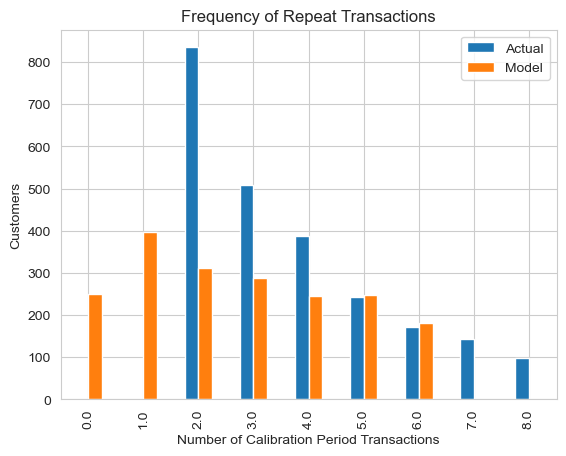

In [152]:
#Plot a figure with period actual and predicted transactions.
plot_period_transactions(BGF,
                         max_frequency = 7)
plt.show()